In [30]:
import pandas as pd
from sqlalchemy import create_engine
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Extract CSVs into DataFrames

In [31]:
btc_file = "Resources/BTC_USD_Historical_Data.csv"
btc_df = pd.read_csv(btc_file)
btc_df["Date Time"] = pd.to_datetime(btc_df["Date"], infer_datetime_format=True) 
btc_df.head()

,Date,Price,Open,High,Low,Vol.,Change %,Date Time
0,"Aug 03, 2019","10,823.0","10,520.0","10,910.0","10,506.0",7.36K,2.89%,2019-08-03
1,"Aug 02, 2019","10,519.0","10,400.0","10,648.3","10,345.0",8.44K,1.15%,2019-08-02
2,"Aug 01, 2019","10,399.0","10,096.0","10,500.0","9,899.9",7.78K,3.08%,2019-08-01
3,"Jul 31, 2019","10,088.0","9,588.9","10,099.0","9,575.5",7.94K,5.20%,2019-07-31
4,"Jul 30, 2019","9,589.0","9,503.5","9,736.0","9,401.6",5.19K,0.86%,2019-07-30


In [32]:
btc_file = "Resources/BTC_USD_Historical_Data.csv"
btc_df = pd.read_csv(btc_file)
btc_df["Date Time"] = pd.to_datetime(btc_df["Date"], infer_datetime_format=True) 

eth_file = "Resources/ETH_USD_Historical_Data.csv"
eth_df = pd.read_csv(eth_file)
eth_df["Date Time"] = pd.to_datetime(eth_df["Date"], infer_datetime_format=True) 

xrp_file = "Resources/XRP_USD_Historical_Data.csv"
xrp_df = pd.read_csv(xrp_file)
xrp_df["Date Time"] = pd.to_datetime(xrp_df["Date"], infer_datetime_format=True) 


djia_file = "Resources/DJIA_Historical_Data.csv"
djia_df = pd.read_csv(djia_file)
djia_df["Date Time"] = pd.to_datetime(djia_df["Date"], infer_datetime_format=True) 

sp500_file = "Resources/S&P_500_Historical_Data.csv"
sp500_df = pd.read_csv(sp500_file)
sp500_df["Date Time"] = pd.to_datetime(sp500_df["Date"], infer_datetime_format=True) 

nasdaq_file = "Resources/NASDAQ_Historical_Data.csv"
nasdaq_df = pd.read_csv(nasdaq_file)
nasdaq_df["Date Time"] = pd.to_datetime(nasdaq_df["Date"], infer_datetime_format=True) 


eur_file = "Resources/EUR_USD_Historical_Data.csv"
eur_df = pd.read_csv(eur_file)
eur_df["Date Time"] = pd.to_datetime(eur_df["Date"], infer_datetime_format=True) 

gbp_file = "Resources/GBP_USD_Historical_Data.csv"
gbp_df = pd.read_csv(gbp_file)
gbp_df["Date Time"] = pd.to_datetime(gbp_df["Date"], infer_datetime_format=True) 

rub_file = "Resources/RUB_USD_Historical_Data.csv"
rub_df = pd.read_csv(rub_file)
rub_df["Date Time"] = pd.to_datetime(rub_df["Date"], infer_datetime_format=True) 

djia_df.head()

,Date,Price,Open,High,Low,Vol.,Change %,Date Time
0,"Aug 02, 2019","26,485.01","26,528.66","26,570.02","26,249.22",335.72M,-0.37%,2019-08-02
1,"Aug 01, 2019","26,583.42","26,879.86","27,175.59","26,548.71",390.49M,-1.05%,2019-08-01
2,"Jul 31, 2019","26,864.27","27,244.67","27,281.65","26,719.60",389.00M,-1.23%,2019-07-31
3,"Jul 30, 2019","27,198.02","27,145.39","27,224.36","27,069.86",293.25M,-0.09%,2019-07-30
4,"Jul 29, 2019","27,221.35","27,192.24","27,275.85","27,178.06",259.32M,0.11%,2019-07-29


In [33]:
combined_df = pd.merge(djia_df[["Date Time","Price"]],nasdaq_df[["Date Time","Price"]], on=["Date Time"], how="left")
combined_df["djia"] = combined_df["Price_x"].apply(str).str.replace(',', '').astype(float)
combined_df["nasdaq"] = combined_df["Price_y"].apply(str).str.replace(',', '').astype(float)

combined_df = pd.merge(combined_df[["Date Time","djia","nasdaq"]],sp500_df[["Date Time","Price"]], on=["Date Time"], how="left")
combined_df["sp500"] = combined_df["Price"].apply(str).str.replace(',', '').astype(float)
del combined_df['Price']

combined_df = pd.merge(combined_df[["Date Time","djia","nasdaq","sp500"]],btc_df[["Date Time","Price"]], on=["Date Time"], how="left")
combined_df["Price"].fillna('0', inplace=True)
combined_df["btc"] = combined_df["Price"].apply(str).str.replace(',', '').astype(float)
del combined_df['Price']

combined_df = pd.merge(combined_df[["Date Time","djia","nasdaq","sp500","btc"]],eth_df[["Date Time","Price"]], on=["Date Time"], how="left")
combined_df["Price"].fillna('0', inplace=True)
combined_df["eth"] = combined_df["Price"].apply(str).str.replace(',', '').astype(float)
del combined_df['Price']

combined_df = pd.merge(combined_df[["Date Time","djia","nasdaq","sp500","btc","eth"]],xrp_df[["Date Time","Price"]], on=["Date Time"], how="left")
combined_df["Price"].fillna('0', inplace=True)
combined_df["xpr"] = combined_df["Price"].apply(str).str.replace(',', '').astype(float)
del combined_df['Price']

combined_df = pd.merge(combined_df[["Date Time","djia","nasdaq","sp500","btc","eth","xpr"]],eur_df[["Date Time","Price"]], on=["Date Time"], how="left")
combined_df["Price"].fillna('0', inplace=True)
combined_df["eur"] = combined_df["Price"].apply(str).str.replace(',', '').astype(float)
del combined_df['Price']

combined_df = pd.merge(combined_df[["Date Time","djia","nasdaq","sp500","btc","eth","xpr","eur"]],gbp_df[["Date Time","Price"]], on=["Date Time"], how="left")
combined_df["gbp"] = combined_df["Price"].apply(str).str.replace(',', '').astype(float)
del combined_df['Price']

combined_df = pd.merge(combined_df[["Date Time","djia","nasdaq","sp500","btc","eth","xpr","eur","gbp"]],rub_df[["Date Time","Price"]], on=["Date Time"], how="left")
combined_df["rub"] = combined_df["Price"].apply(str).str.replace(',', '').astype(float)
del combined_df['Price']

combined_df.rename(columns={"Date Time":"close_dt"}, inplace=True)
combined_df.sort_values(by='close_dt', ascending=True, inplace=True)


In [34]:
combined_df.head(10)

,close_dt,djia,nasdaq,sp500,btc,eth,xpr,eur,gbp,rub
1029,2015-07-01,17757.91,5013.12,2077.42,258.1,0.0,0.0,1.1054,1.5618,0.0179
1028,2015-07-02,17730.11,5009.21,2076.78,254.5,0.0,0.0,1.1084,1.5609,0.0180
1027,2015-07-06,17683.58,4991.94,2068.76,274.8,0.0,0.0,1.1057,1.5606,0.0176
1026,2015-07-07,17776.91,4997.46,2081.34,265.5,0.0,0.0,1.1012,1.5462,0.0176
1025,2015-07-08,17515.42,4909.76,2046.68,270.8,0.0,0.0,1.1077,1.5362,0.0174
1024,2015-07-09,17548.62,4922.40,2051.31,269.2,0.0,0.0,1.1038,1.5380,0.0175
1023,2015-07-10,17760.41,4997.70,2076.62,286.7,0.0,0.0,1.1164,1.5526,0.0178
1022,2015-07-13,17977.68,5071.51,2099.60,292.6,0.0,0.0,1.1004,1.5488,0.0177
1021,2015-07-14,18053.58,5104.89,2108.95,286.9,0.0,0.0,1.1012,1.5636,0.0177
1020,2015-07-15,18050.17,5098.94,2107.40,285.4,0.0,0.0,1.0949,1.5637,0.0176


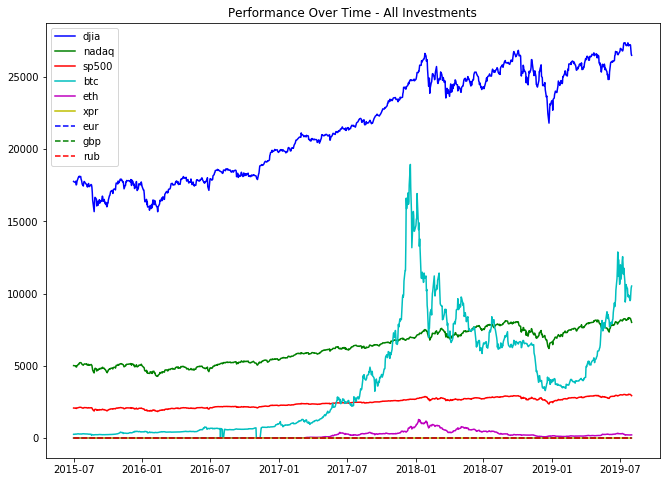

In [35]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

fig = plt.figure(figsize=(11,8))

plt.title('Performance Over Time - All Investments')

plt.plot(combined_df["close_dt"], combined_df["djia"], label='djia', color='b', )
plt.plot(combined_df["close_dt"], combined_df["nasdaq"], label='nadaq', color='g' )
plt.plot(combined_df["close_dt"], combined_df["sp500"], label='sp500', color='r' )
plt.plot(combined_df["close_dt"], combined_df["btc"], label='btc', color='c' )
plt.plot(combined_df["close_dt"], combined_df["eth"], label='eth', color='m' )
plt.plot(combined_df["close_dt"], combined_df["xpr"], label='xpr', color='y' )
plt.plot(combined_df["close_dt"], combined_df["eur"], label='eur', color='b', linestyle = '--' )
plt.plot(combined_df["close_dt"], combined_df["gbp"], label='gbp', color='g', linestyle = '--' )
plt.plot(combined_df["close_dt"], combined_df["rub"], label='rub', color='r', linestyle = '--' )


plt.legend(loc=2)
plt.draw()

#plt.savefig('smooth_plot.png')


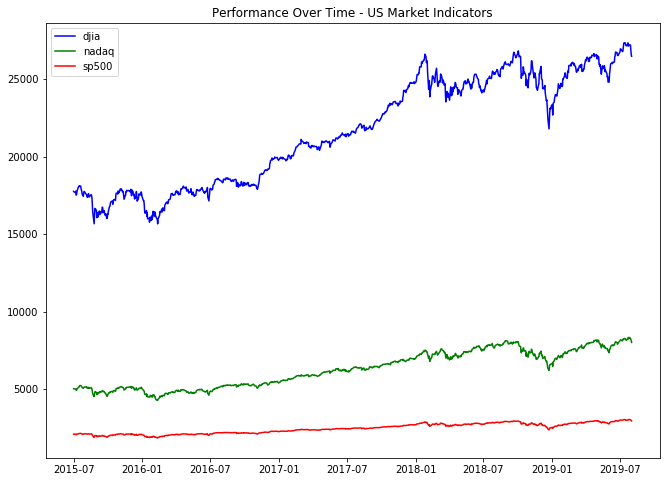

In [36]:
fig = plt.figure(figsize=(11,8))

plt.title('Performance Over Time - US Market Indicators')

plt.plot(combined_df["close_dt"], combined_df["djia"], label='djia', color='b', )
plt.plot(combined_df["close_dt"], combined_df["nasdaq"], label='nadaq', color='g' )
plt.plot(combined_df["close_dt"], combined_df["sp500"], label='sp500', color='r' )

plt.legend(loc=2)
plt.draw()

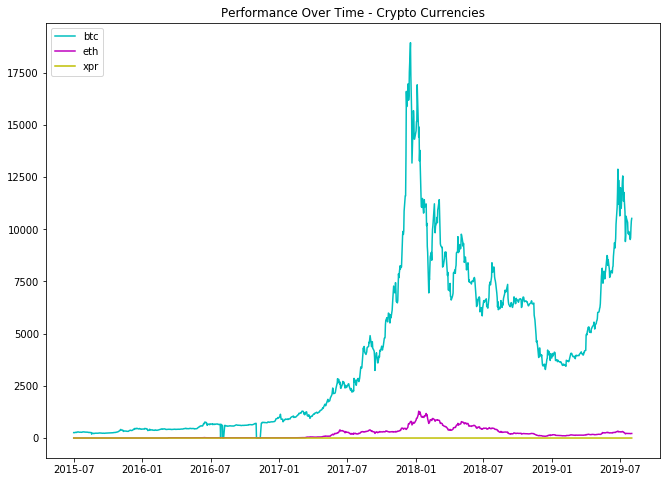

In [37]:
fig = plt.figure(figsize=(11,8))

plt.title('Performance Over Time - Crypto Currencies')

plt.plot(combined_df["close_dt"], combined_df["btc"], label='btc', color='c' )
plt.plot(combined_df["close_dt"], combined_df["eth"], label='eth', color='m' )
plt.plot(combined_df["close_dt"], combined_df["xpr"], label='xpr', color='y' )

plt.legend(loc=2)
plt.draw()


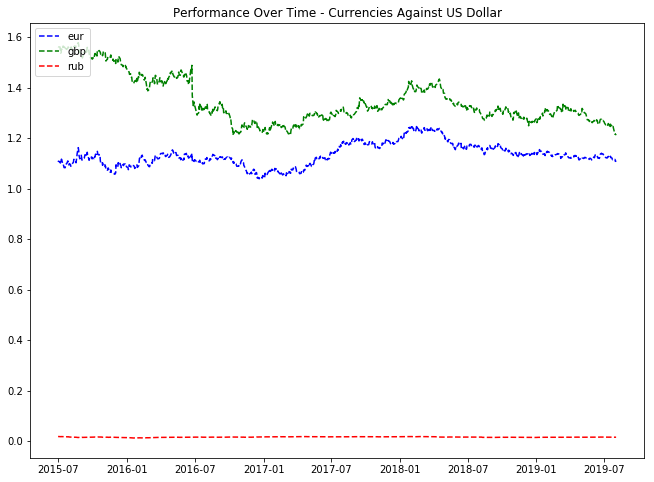

In [38]:
fig = plt.figure(figsize=(11,8))

plt.title('Performance Over Time - Currencies Against US Dollar')

plt.plot(combined_df["close_dt"], combined_df["eur"], label='eur', color='b', linestyle = '--' )
plt.plot(combined_df["close_dt"], combined_df["gbp"], label='gbp', color='g', linestyle = '--' )
plt.plot(combined_df["close_dt"], combined_df["rub"], label='rub', color='r', linestyle = '--' )

plt.legend(loc=2)
plt.draw()


### Create database connection

In [39]:
connection_string = "postgres:xxxx@localhost:5432/crypto_db"
engine = create_engine(f'postgresql://{connection_string}')

In [40]:
# Confirm tables
engine.table_names()
#engine.execute("SELECT * FROM market_history").fetchall()

['market_history']

### Load DataFrames into database

In [41]:
engine.execute("TRUNCATE market_history")
combined_df.to_sql(name='market_history', con=engine, if_exists='append', index=False)

In [42]:
df = pd.read_sql_query('select * from market_history_normalized',con=engine)

In [43]:
df.tail()

,close_dt,djia,nasdaq,sp500,btc,eth,xpr,eur,gbp,rub
1025,2019-07-29,1.53291,1.65433,1.45419,36.8346,17.9413,0.149855,1.00814,0.782367,0.882682
1026,2019-07-30,1.53160,1.65039,1.45044,37.1523,17.8502,0.153623,1.00914,0.778013,0.879888
1027,2019-07-31,1.51281,1.63080,1.43465,39.0856,18.6128,0.154493,1.00199,0.778525,0.877095
1028,2019-08-01,1.49699,1.61798,1.42174,40.2906,18.5157,0.152464,1.00280,0.776860,0.865922
1029,2019-08-02,1.49145,1.59662,1.41139,40.7555,18.5209,0.150483,1.00498,0.778269,0.854749


<Figure size 792x576 with 0 Axes>

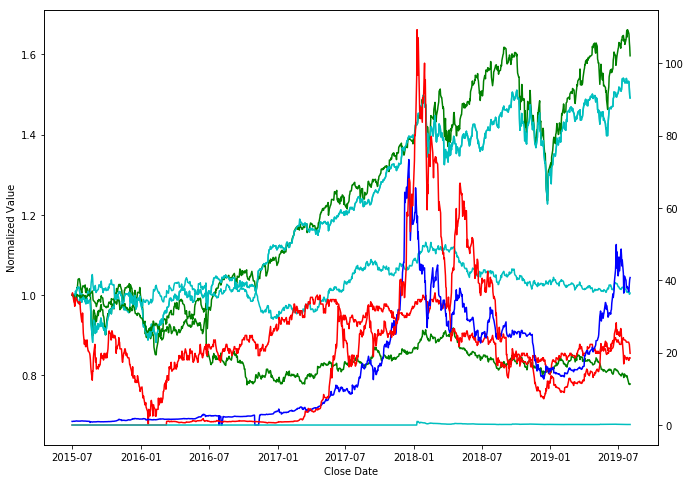

<Figure size 792x576 with 0 Axes>

In [44]:
fig = plt.figure(figsize=(11,8))

#ax1 = fig.add_subplot(111)
fig, ax1 = plt.subplots(figsize=(11,8))
fig = plt.figure(figsize=(11,8))

ax1.plot(df["close_dt"], df["djia"], label='djia', color='c', )
ax1.plot(df["close_dt"], df["nasdaq"], label='nadaq', color='g' )
ax1.plot(df["close_dt"], df["djia"], label='sp500', color='c' )

ax1.set_xlabel('Close Date')
ax1.set_ylabel('Normalized Value')

ax2 = ax1.twinx()  
ax2.plot(df["close_dt"], df["btc"], label='btc', color='b', )
ax2.plot(df["close_dt"], df["eth"], label='eth', color='r' )
ax2.plot(df["close_dt"], df["xpr"], label='xpr', color='c', )
ax1.plot(df["close_dt"], df["eur"], label='eur', color='c', )
ax1.plot(df["close_dt"], df["gbp"], label='gbp', color='g' )
ax1.plot(df["close_dt"], df["rub"], label='rub', color='r' )

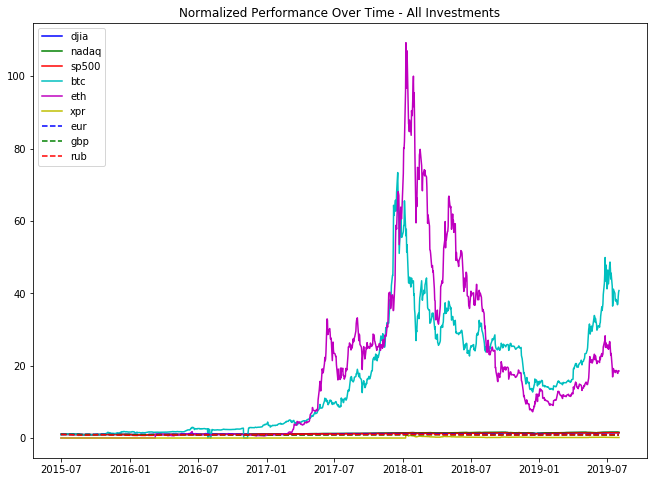

In [45]:
fig = plt.figure(figsize=(11,8))
plt.title('Normalized Performance Over Time - All Investments')

plt.plot(combined_df["close_dt"], df["djia"], label='djia', color='b', )
plt.plot(combined_df["close_dt"], df["nasdaq"], label='nadaq', color='g' )
plt.plot(combined_df["close_dt"], df["sp500"], label='sp500', color='r' )
plt.plot(combined_df["close_dt"], df["btc"], label='btc', color='c' )
plt.plot(combined_df["close_dt"], df["eth"], label='eth', color='m' )
plt.plot(combined_df["close_dt"], df["xpr"], label='xpr', color='y' )
plt.plot(combined_df["close_dt"], df["eur"], label='eur', color='b', linestyle = '--' )
plt.plot(combined_df["close_dt"], df["gbp"], label='gbp', color='g', linestyle = '--' )
plt.plot(combined_df["close_dt"], df["rub"], label='rub', color='r', linestyle = '--' )

plt.legend(loc=2)
plt.draw()

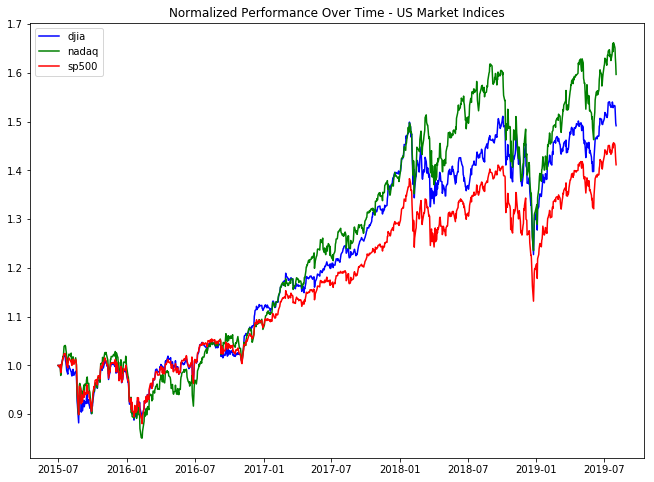

In [46]:
fig = plt.figure(figsize=(11,8))
plt.title('Normalized Performance Over Time - US Market Indices')

plt.plot(combined_df["close_dt"], df["djia"], label='djia', color='b', )
plt.plot(combined_df["close_dt"], df["nasdaq"], label='nadaq', color='g' )
plt.plot(combined_df["close_dt"], df["sp500"], label='sp500', color='r' )


plt.legend(loc=2)
plt.draw()

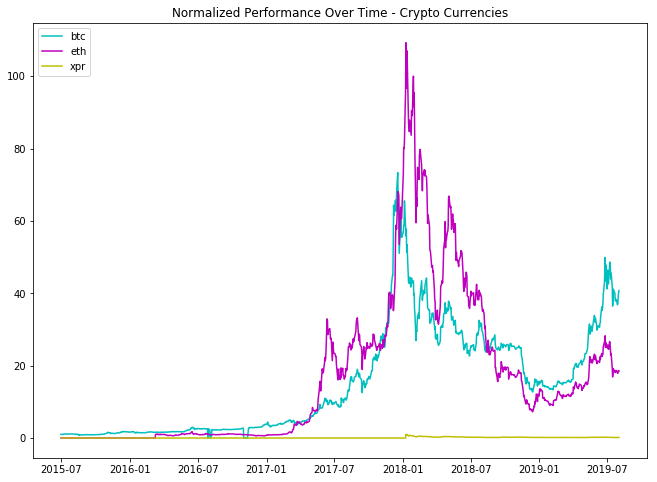

In [47]:
fig = plt.figure(figsize=(11,8))
plt.title('Normalized Performance Over Time - Crypto Currencies')

plt.plot(combined_df["close_dt"], df["btc"], label='btc', color='c' )
plt.plot(combined_df["close_dt"], df["eth"], label='eth', color='m' )
plt.plot(combined_df["close_dt"], df["xpr"], label='xpr', color='y' )

plt.legend(loc=2)
plt.draw()

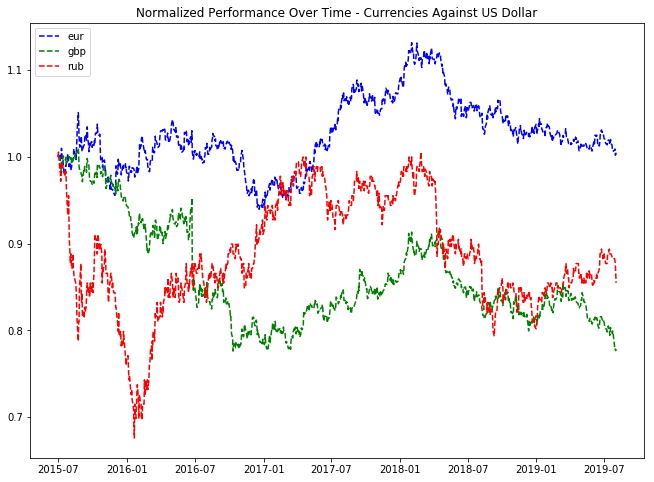

In [48]:
fig = plt.figure(figsize=(11,8))
plt.title('Normalized Performance Over Time - Currencies Against US Dollar')


plt.plot(combined_df["close_dt"], df["eur"], label='eur', color='b', linestyle = '--' )
plt.plot(combined_df["close_dt"], df["gbp"], label='gbp', color='g', linestyle = '--' )
plt.plot(combined_df["close_dt"], df["rub"], label='rub', color='r', linestyle = '--' )

plt.legend(loc=2)
plt.draw()